<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject1/MiniProject_Ton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Preparació codi
Importar llibreries, google.colab i escollir taula.

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/data_course/US_Accidents_Dec19.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


#2. Informació general de la taula
Forma, columnes, agrupacions...

In [0]:
df.shape

(2974335, 49)

In [0]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [0]:
df_agrup = df.groupby(by=['Severity'])
df_agrup.count()

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,968,968,968,968,968,968,968,0,0,968,968,708,968,968,968,968,968,968,968,968,968,958,952,260,950,956,947,955,813,236,947,968,968,968,968,968,968,968,968,968,968,968,968,968,968,968,968,968
2,1993410,1993410,1468069,1993410,1993410,1993410,1993410,525341,525341,1993410,1993410,951700,1993410,1993410,1993350,1993410,1993410,1992851,1993410,1990897,1989993,1969791,1958052,783266,1955834,1963304,1953285,1963772,1709004,683672,1953199,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993410,1993345,1993345,1993345,1993345
3,887620,887620,772423,887620,887620,887620,887620,115197,115197,887620,887619,63367,887620,887620,887611,887620,887620,887374,887620,887078,885648,876111,869296,299756,868548,871660,864982,873969,747342,262923,864890,887620,887620,887620,887620,887620,887620,887620,887620,887620,887620,887620,887620,887620,887609,887609,887609,887609
4,92337,92337,4804,92337,92337,92337,92337,87533,87533,92337,92337,40955,92337,92337,92323,92337,92337,92262,92337,92229,92035,90770,89972,38430,89830,90273,89430,90538,76336,29146,89367,92337,92337,92337,92337,92337,92337,92337,92337,92337,92337,92337,92337,92337,92320,92320,92320,92320


In [0]:
df_agrup2 = df.groupby(by=['City'])
df_agrup2.count()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaronsburg,4,4,2,4,4,4,4,4,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,3,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Abbeville,224,224,222,224,224,224,224,224,2,2,224,224,204,224,224,224,224,224,224,224,224,222,222,78,222,222,222,222,187,86,222,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224,224
Abbotsford,14,14,5,14,14,14,14,14,9,9,14,14,4,14,14,14,14,14,14,14,14,14,14,10,14,14,14,14,14,6,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Abbott,30,30,30,30,30,30,30,30,0,0,30,30,2,30,30,30,30,30,30,30,30,30,29,4,29,30,30,30,30,7,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Abbottstown,37,37,31,37,37,37,37,37,6,6,37,37,32,37,37,37,37,37,37,37,37,37,37,15,37,37,37,37,25,7,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zortman,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zumbro Falls,11,11,7,11,11,11,11,11,4,4,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,9,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Zumbrota,82,82,42,82,82,82,82,82,40,40,82,82,53,82,82,82,82,82,82,82,82,82,81,68,81,82,81,82,75,49,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82


In [0]:
df_agrup2.count().sort_values(by=['ID'],ascending=False)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Houston,93289,93289,80967,93289,93289,93289,93289,93289,12322,12322,93289,93288,39787,93289,93289,93289,93289,93289,93289,93289,93289,91227,91141,20236,91137,91217,91196,91195,80230,21523,91078,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289,93289
Charlotte,68054,68054,55694,68054,68054,68054,68054,68054,12360,12360,68054,68054,41500,68054,68054,68054,68054,68054,68054,68054,68054,67933,67906,23905,67904,67931,67878,67875,58163,22232,67881,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054,68054
Los Angeles,65851,65851,45804,65851,65851,65851,65851,65851,20047,20047,65851,65851,14929,65851,65851,65851,65851,65851,65851,65851,65851,65675,65457,15895,65425,65573,65572,65355,43813,18703,65564,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851,65851
Austin,58703,58703,57151,58703,58703,58703,58703,58703,1552,1552,58703,58703,37843,58703,58703,58703,58703,58703,58703,58703,58703,58511,58388,15310,58186,58450,57731,58317,49839,17863,58087,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703,58703
Dallas,58036,58036,47844,58036,58036,58036,58036,58036,10192,10192,58036,58036,15997,58036,58036,58036,58036,58036,58036,58036,58036,57983,57879,16707,57866,57940,57855,57950,54555,16346,57765,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036,58036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Long Island,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Trout Lake,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Long Eddy,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#3. Gràfiques
Comparem la severitat dels accidents amb condicions meteorològiques.

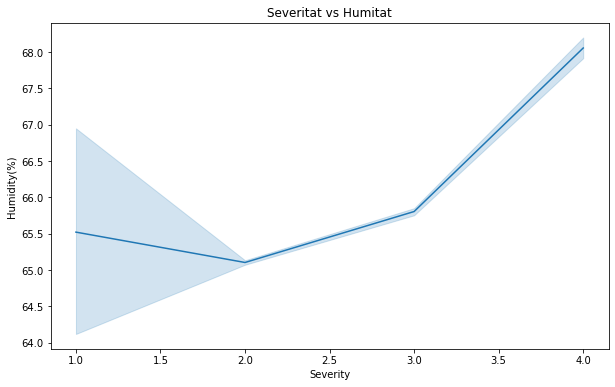

In [0]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Severity", y="Humidity(%)", data=df)
ax.set_title('Severitat vs Humitat')
plt.show()

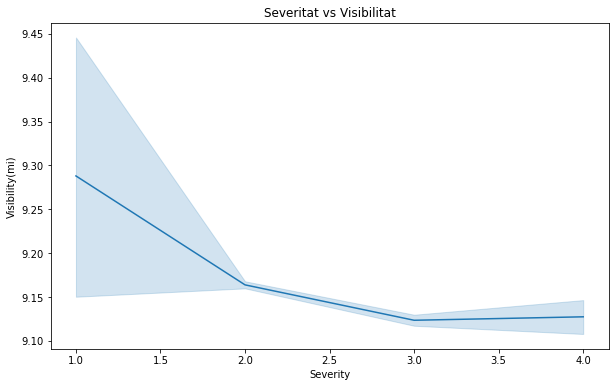

In [0]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Severity", y="Visibility(mi)", data=df)
ax.set_title('Severitat vs Visibilitat')
plt.show()

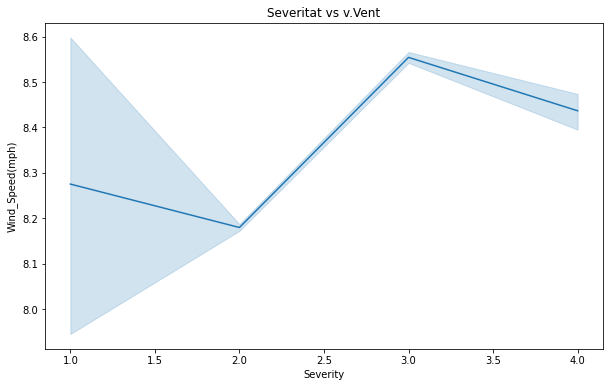

In [0]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Severity", y="Wind_Speed(mph)", data=df)
ax.set_title('Severitat vs v.Vent')
plt.show()

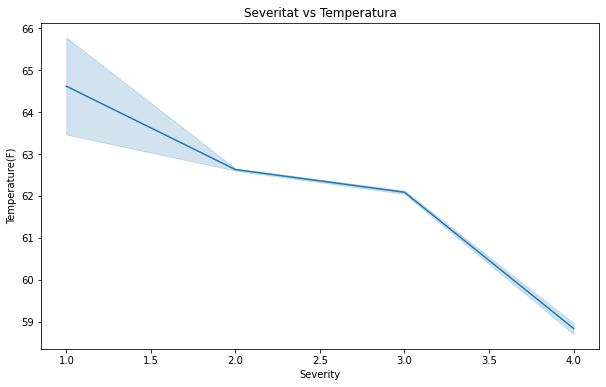

In [0]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Severity", y="Temperature(F)", data=df)
ax.set_title('Severitat vs Temperatura')
plt.show()

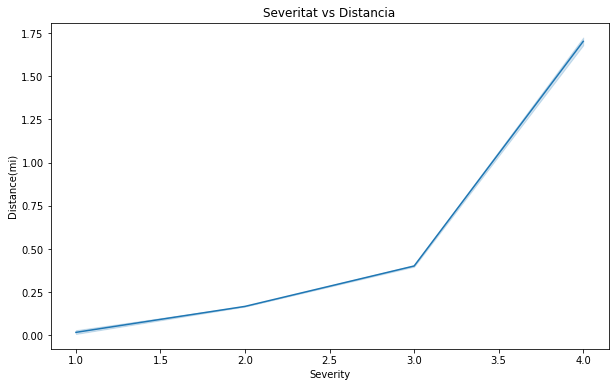

In [0]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Severity", y="Distance(mi)", data=df)
ax.set_title('Severitat vs Distancia')
plt.show()

#4. Valors NaN
Busquem alternatives per eliminar els valors NaN de la taula amb columnes numèriques.

In [0]:
df_num = df.select_dtypes(include='number')
df_num

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.010,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.010,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.010,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.010,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.010,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,NaN,2,34.002480,-117.379360,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2974331,NaN,2,32.766960,-117.148060,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2974332,NaN,2,33.775450,-117.847790,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2974333,NaN,2,33.992460,-118.403020,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [0]:
df_fillmean = df.fillna(df.mean())
df_fillmean.head()